In [ ]:
conda install -c anaconda statsmodels

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("PL_Stats.csv")

In [11]:
df.columns = ['Rank','Player','Team', 'GP', 'GS','Min', 'Goals','Assists','Shots','Shots on Goal']

df['Goals per game'] = df['Goals']/df['GP']
df.replace(float('inf'), 0)
df = df.fillna(0)

df.tail

<bound method NDFrame.tail of      Rank                     Player                      Team  GP  GS   Min  \
0       1                Jamie Vardy            Leicester City  35  34  3034   
1       2                 Danny Ings               Southampton  38  32  2812   
2       3  Pierre-Emerick Aubameyang                   Arsenal  36  35  3138   
3       4  Raheem Shaquille Sterling           Manchester City  33  30  2660   
4       5        Mohamed Salah Ghaly                 Liverpool  34  33  2884   
..    ...                        ...                       ...  ..  ..   ...   
535   536              Dennis Cirkin         Tottenham Hotspur   0   0     0   
536   537            Darnell Johnson            Leicester City   0   0     0   
537   538        Timothy Fosu-Mensah         Manchester United   3   2   136   
538   539             Conor Coventry           West Ham United   0   0     0   
539   540              Alex Cochrane  Brighton and Hove Albion   0   0     0   

     Goal

In [16]:
import statsmodel.api as sm

variables = df['GP', 'GS','Min','Assists','Shots','Shots on Goal','Goals per game']
X = sm.add_constant(variables)
model = sm.OLS(df['Goals'],variables).fit
summary = model.summary()

ModuleNotFoundError: No module named 'statsmodel'

In [18]:
m, c = np.polyfit(df['Shots on Goal'],df['Goals per game'], 1)
print(m,c)

0.010825217204981504 0.001824607706990895


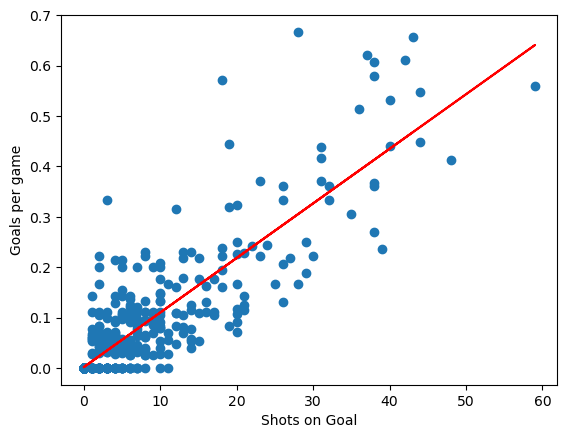

In [20]:
plt.scatter(df['Shots on Goal'], df['Goals per game'])
plt.plot(df['Shots on Goal'], m*df['Shots on Goal']+c, color='red')
plt.xlabel("Shots on Goal")
plt.ylabel("Goals per game")

plt.show()

In [22]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(df['Shots on Goal'], df['Goals per game'], test_size = 0.2, random_state = 4)

X_train = pd.Series(X_train)
X_train = pd.DataFrame(X_train)

X_test = pd.Series(X_test)

X_test = pd.DataFrame(X_test)

In [24]:
X_train_norm = preprocessing.StandardScaler().fit(X_train.values.reshape(-1, 1)).transform(X_train.values.reshape(-1, 1).astype(float))
X_train_norm[0:5]

array([[0.4299543 ],
       [0.75074922],
       [0.10915938],
       [0.4299543 ],
       [2.67551874]])

In [26]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(regr.coef_, regr.intercept_)


[0.01092083] 0.00293888340729527


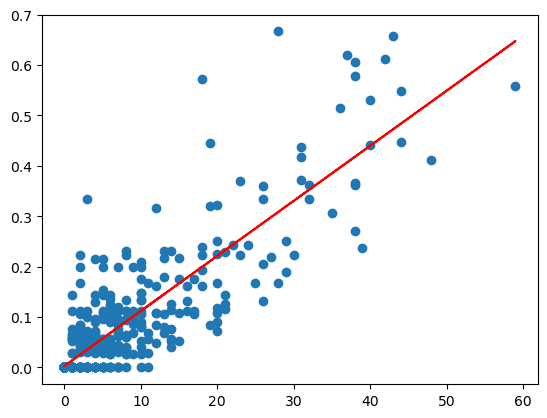

In [28]:
plt.scatter(df['Shots on Goal'], df['Goals per game'])
plt.plot(X_train, regr.coef_[0]*X_train+regr.intercept_, color='red')

In [112]:
from sklearn.metrics import r2_score

y_hat = regr.predict(X_test)

print(r2_score(y_test, y_hat))
print(np.mean(np.absolute((y_hat - y_test))))
print(np.mean((y_hat-y_test)**2))

0.7690583207474994
0.03004841557998017
0.002468120083782668
